In [33]:
# Task 1: Q1)Import necessary libraries
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import numpy as np


In [23]:
# Q2)Display all the Columns of DataFrames
df = pd.read_excel("G:\\CoachX\\Python\\Project Capstone\\HousePrediction.xlsx")
pd.set_option('display.max_columns', None)

In [3]:
# Q3) Read the data from an Excel worksheet and display the first 100 rows
print(df.head(100))

    Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0    0          60       RL     8450    Inside     1Fam            5   
1    1          20       RL     9600       FR2     1Fam            8   
2    2          60       RL    11250    Inside     1Fam            5   
3    3          70       RL     9550    Corner     1Fam            5   
4    4          60       RL    14260       FR2     1Fam            5   
..  ..         ...      ...      ...       ...      ...          ...   
95  95          60       RL     9765    Corner     1Fam            8   
96  96          20       RL    10264    Inside     1Fam            5   
97  97          20       RL    10921    Inside     1Fam            5   
98  98          30       RL    10625    Corner     1Fam            5   
99  99          20       RL     9320    Inside     1Fam            5   

    Year_Built  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0         2003          2003     VinylSd         0.0    

In [4]:
# Q4) Give the column insights
print("Column Insights:")
print(df.info())

Column Insights:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   Year_Built    2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB
None


In [24]:
#Task 2:
# Q1) Checking for Missing Values
missing_values = df.isnull().sum()
print("Missing Values= ")
print(missing_values[missing_values > 0])

Missing Values= 
MSZoning          4
Exterior1st       1
BsmtFinSF2        1
TotalBsmtSF       1
SalePrice      1459
dtype: int64


In [25]:
# Q2) Features with NAN Values
nan_values = df.columns[df.isnull().any()].tolist()
print("Features with NAN Values:")
print(nan_values)


Features with NAN Values:
['MSZoning', 'Exterior1st', 'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice']


In [26]:
# Q3) Calculate mean sales Price where the information is present or Missing
mean_sales_price = df['SalePrice'].mean()
print("Mean Sales Price (including missing values):")
print(mean_sales_price)

Mean Sales Price (including missing values):
180921.19589041095


In [27]:
# Q4) Gives the Count of Numerical features
numerical_features_count = df.select_dtypes(include=np.number).shape[1]
print("Count of Numerical Features:")
print(numerical_features_count)

Count of Numerical Features:
9


In [28]:
# Q5) Prints the first five rows of numerical values
print("First Five Rows of Numerical Values:")
print(df.select_dtypes(include=np.number).head())

First Five Rows of Numerical Values:
   Id  MSSubClass  LotArea  OverallCond  Year_Built  YearRemodAdd  BsmtFinSF2  \
0   0          60     8450            5        2003          2003         0.0   
1   1          20     9600            8        1976          1976         0.0   
2   2          60    11250            5        2001          2002         0.0   
3   3          70     9550            5        1915          1970         0.0   
4   4          60    14260            5        2000          2000         0.0   

   TotalBsmtSF  SalePrice  
0        856.0   208500.0  
1       1262.0   181500.0  
2        920.0   223500.0  
3        756.0   140000.0  
4       1145.0   250000.0  


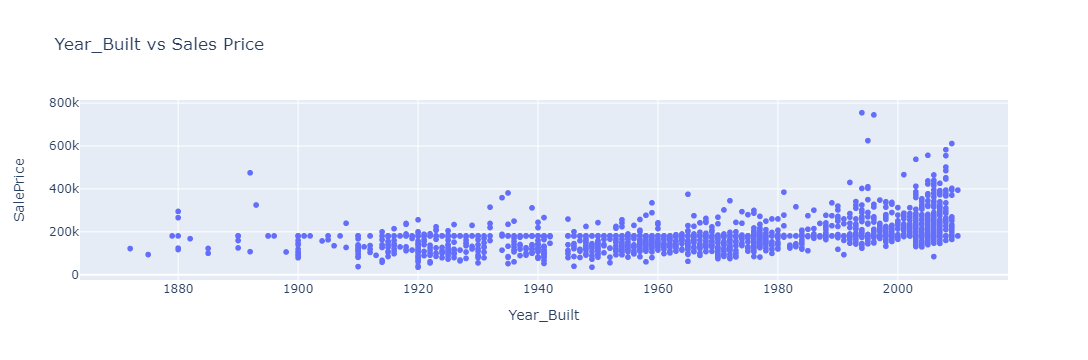

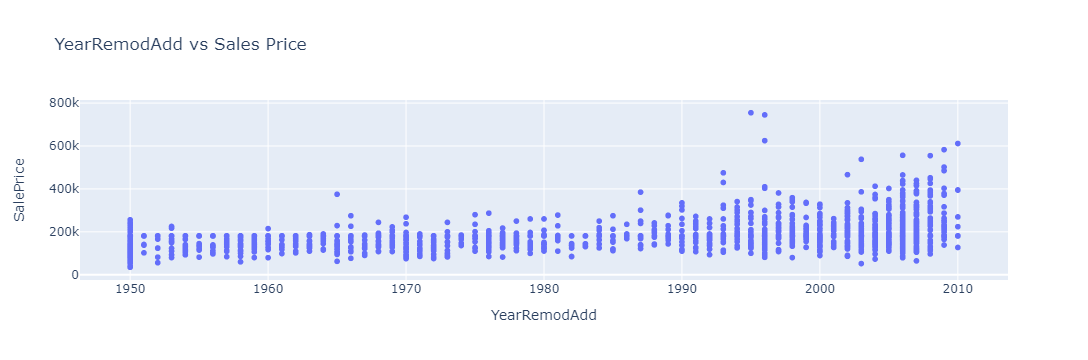

In [35]:
#Q6) We will Compare the difference between all the years features with SalesPrice

# Handle missing values by filling with the mean
df['Year_Built'].fillna(df['Year_Built'].mean(), inplace=True)
df['YearRemodAdd'].fillna(df['YearRemodAdd'].mean(), inplace=True)
df['SalePrice'].fillna(df['SalePrice'].mean(), inplace=True)

years_features = ['Year_Built', 'YearRemodAdd']

for feature in years_features:
    # Create scatter plot
    fig = px.scatter(df, x=feature, y='SalePrice', title=f'{feature} vs Sales Price')
    fig.show()



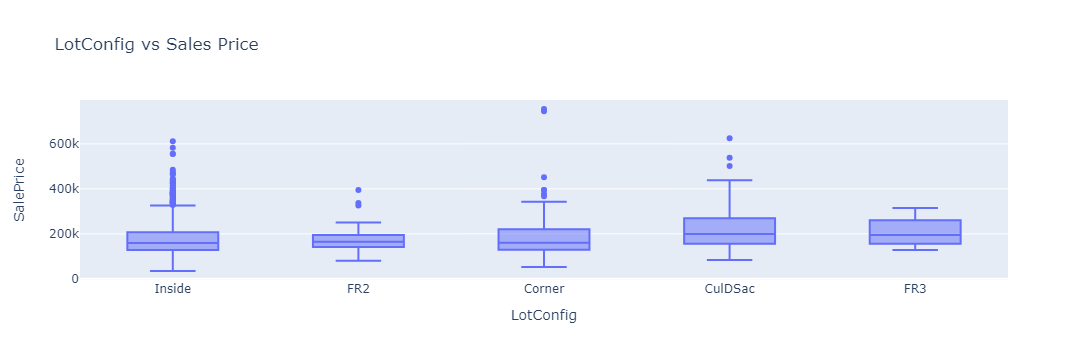

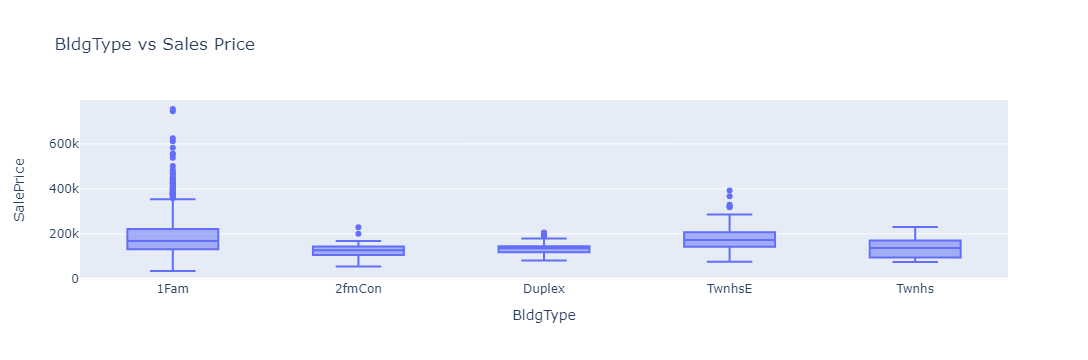

In [13]:
# Q7) On the Discrete Variable Find the relationship between Discrete and Sales price
discrete_features = [feature for feature in df.columns if len(df[feature].unique()) < 25 and feature != 'SalePrice']
for feature in discrete_features:
    fig = px.box(df, x=feature, y='SalePrice', title=f'{feature} vs Sales Price')
    fig.show()

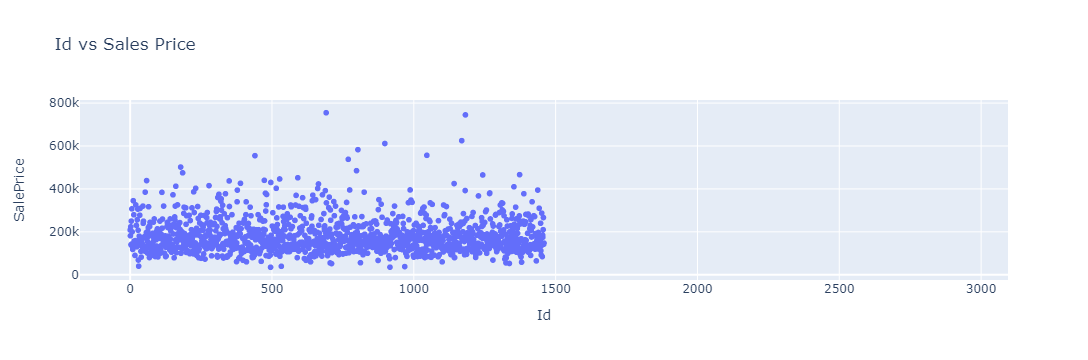

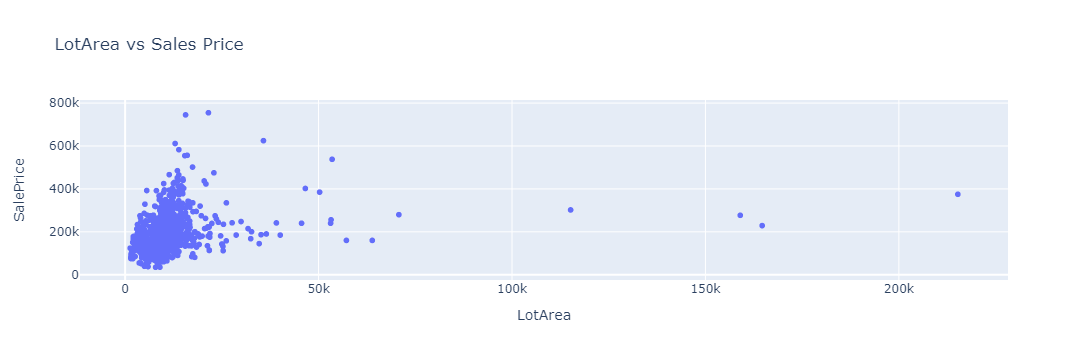

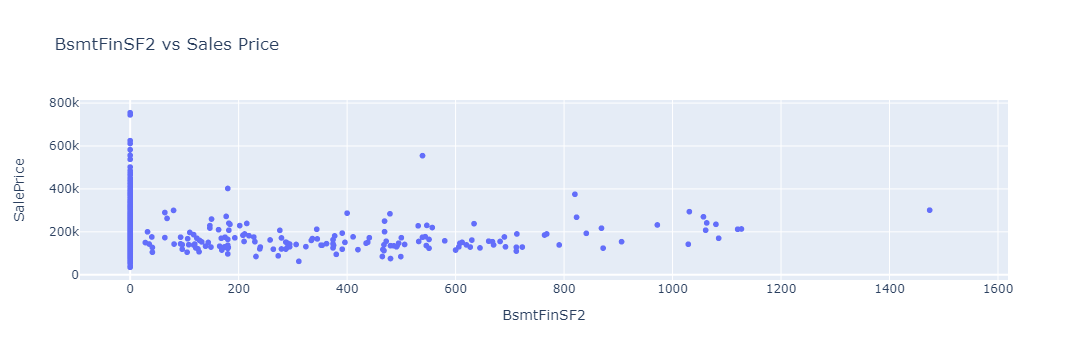

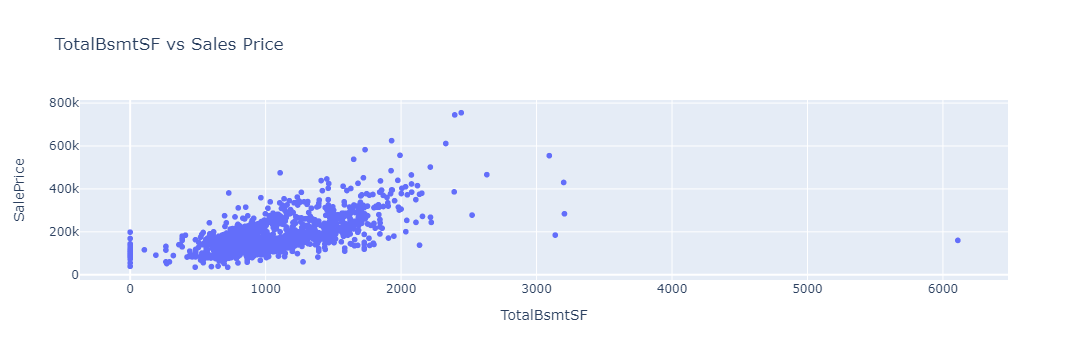

In [14]:
# Q8) On the Continuous Variable Find the relationship between Continuous and Sales Price
continuous_features = [feature for feature in df.columns if feature not in discrete_features and feature != 'SalePrice']
for feature in continuous_features:
    fig = px.scatter(df, x=feature, y='SalePrice', title=f'{feature} vs Sales Price')
    fig.show()


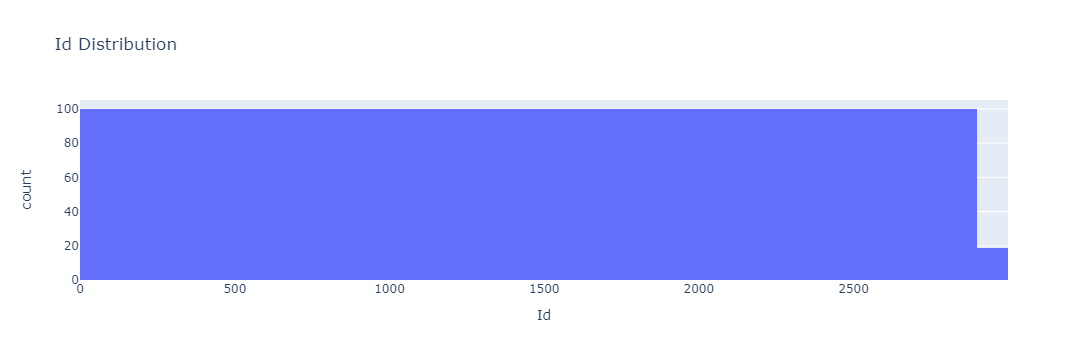

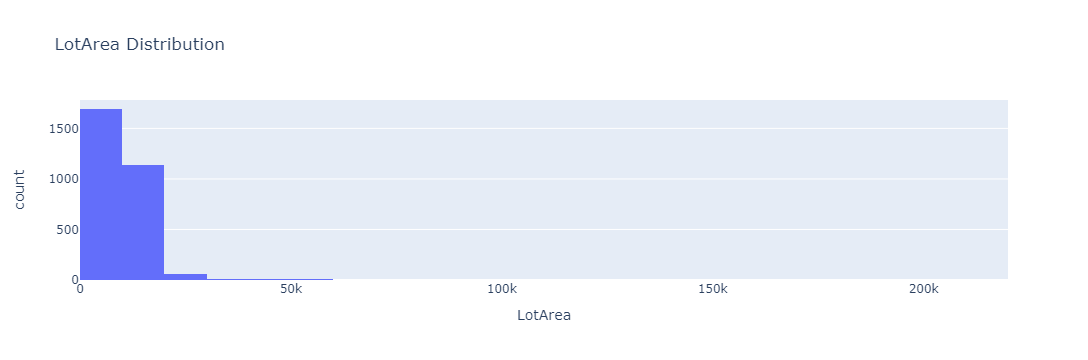

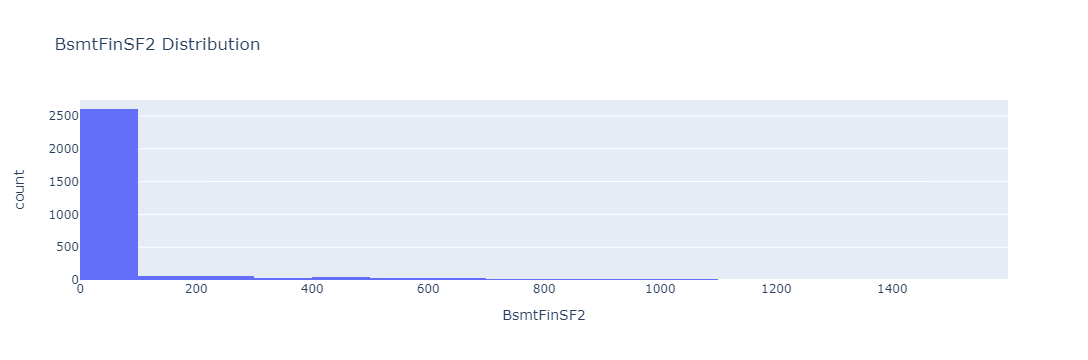

In [15]:
# Q9) Analyse the Continuous values by creating the histogram to understand the distribution.
for feature in continuous_features:
    fig = px.histogram(df, x=feature, nbins=30, title=f'{feature} Distribution')
    fig.show()

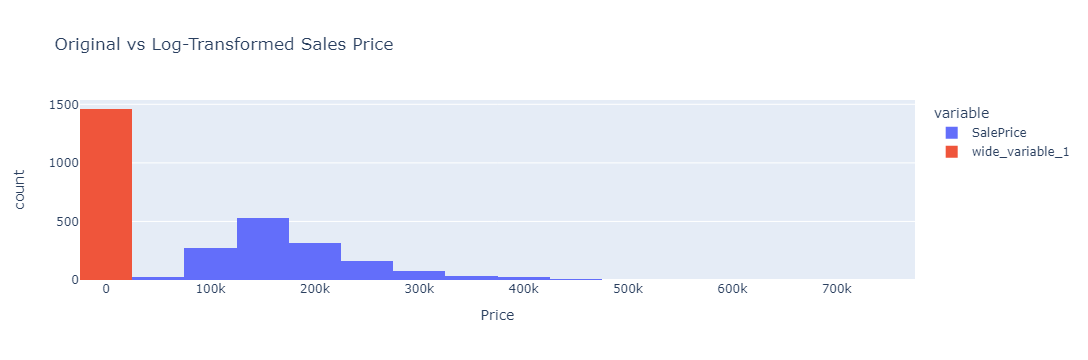

In [16]:
# Q10) Apply the Logarithmic Transformation
log_transformed_price = np.log1p(df['SalePrice'])

fig = px.histogram(df, x=['SalePrice', log_transformed_price], nbins=30, labels={'value': 'Price'}, title='Original vs Log-Transformed Sales Price')
fig.show()

In [17]:
# Task 3:
# Q1) Find the Outliers
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

fig = px.box(df, y=numerical_features)
fig.update_layout(title="Boxplot of Numerical Features")
fig.show()

In [18]:
# Q2) Find the relationship between Categorical feature and Sales Price
# Assuming you have a categorical feature named 'CategoryFeature'
fig = px.box(df, x='MSSubClass', y='SalePrice')
fig.update_layout(title="Relationship between MSSubClass and SalePrice")
fig.show()

In [19]:
# Q3) Find the Correlation between Numerical Features and Sales Price
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_columns].corr()

correlation_with_sale_price = correlation_matrix['SalePrice'].sort_values(ascending=False)

fig = go.Figure(data=[go.Bar(x=correlation_with_sale_price.index, y=correlation_with_sale_price)])
fig.update_layout(title="Correlation between Numerical Features and Sale Price")
fig.show()


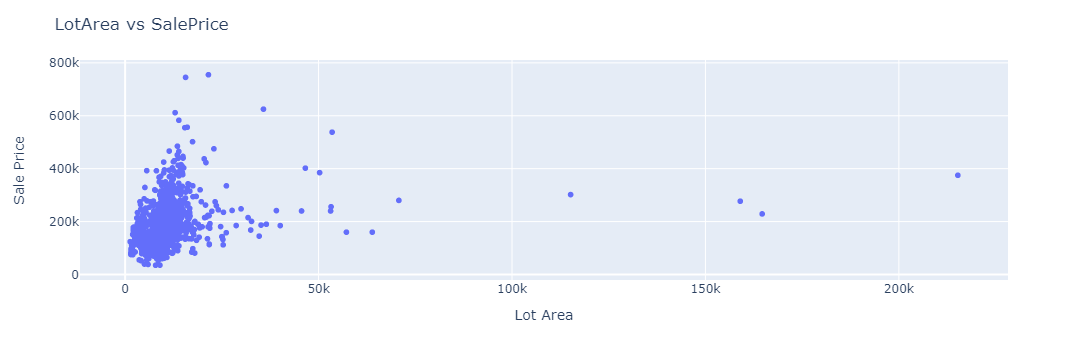

In [20]:
#Q4) Find Continuous Features vs Sales Price
# Replace 'LotArea' with the continuous feature you want to analyze
fig = px.scatter(df, x='LotArea', y='SalePrice')
fig.update_layout(title="LotArea vs SalePrice", xaxis_title="Lot Area", yaxis_title="Sale Price")
fig.show()


In [21]:
#Q5) Feature Engineering
#a) Handle the Missing Values
missing_values.fillna(df['SalePrice'].mean(), inplace=True)

#b) Handle the Categorical Variables
df = pd.get_dummies(df, columns=['MSSubClass'], drop_first=True)

#c) Handle  the Numerical Variables

#d) Handling  the Temporal Varaibles
# Assuming 'YearRemodAdd' is the actual column name, replace it if needed
temporal_feature = 'Year_Built'

# Check if the column exists
if temporal_feature in df.columns:
    # d) Handling the Temporal Variables
    df['YearRemoAdd'] = 2023 - df[temporal_feature]
    df.drop(temporal_feature, axis=1, inplace=True)
    print("Temporal variable handled successfully.")
else:
    print(f"Error: '{temporal_feature}' column not found in the DataFrame.")

Temporal variable handled successfully.
